# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading CSV file

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# overview of distribution and central tendencies of data

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# correlation between columns

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

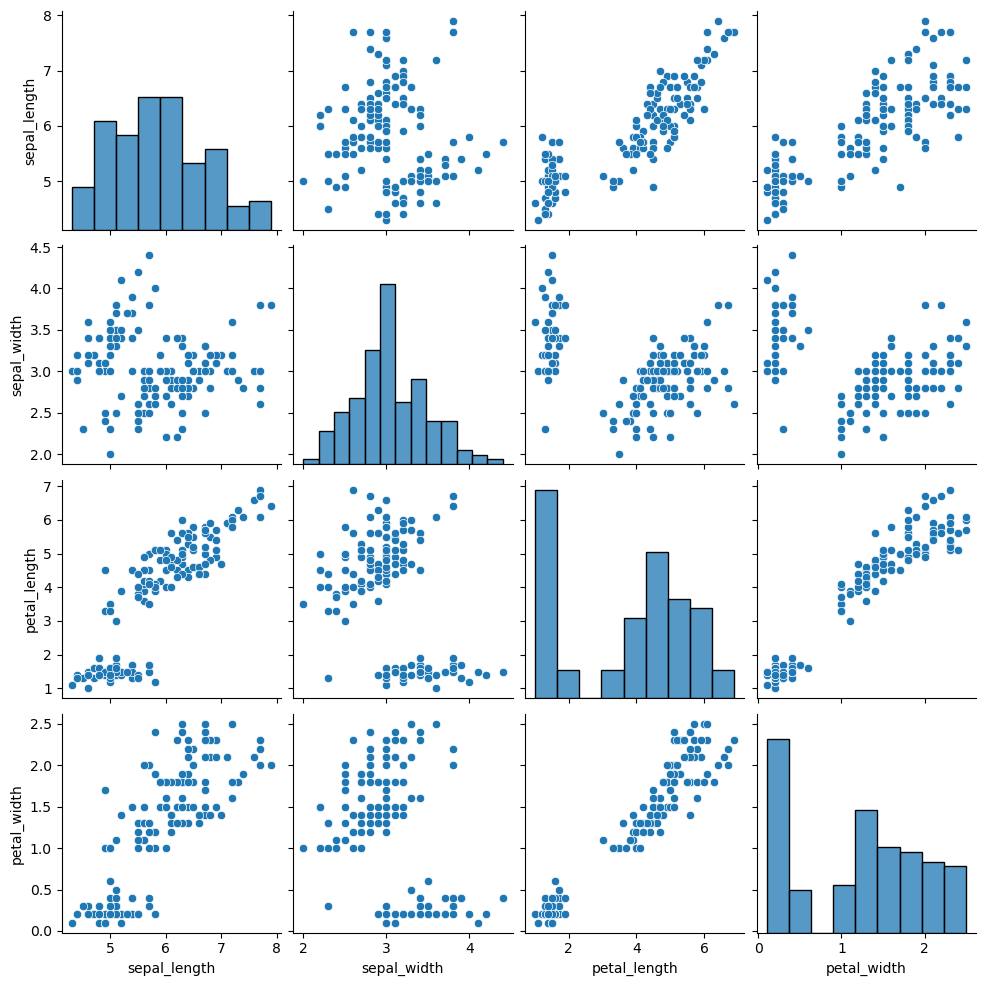

In [25]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

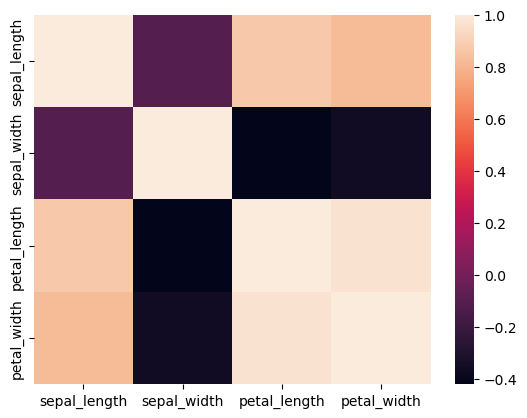

In [26]:
sns.heatmap(df.corr())

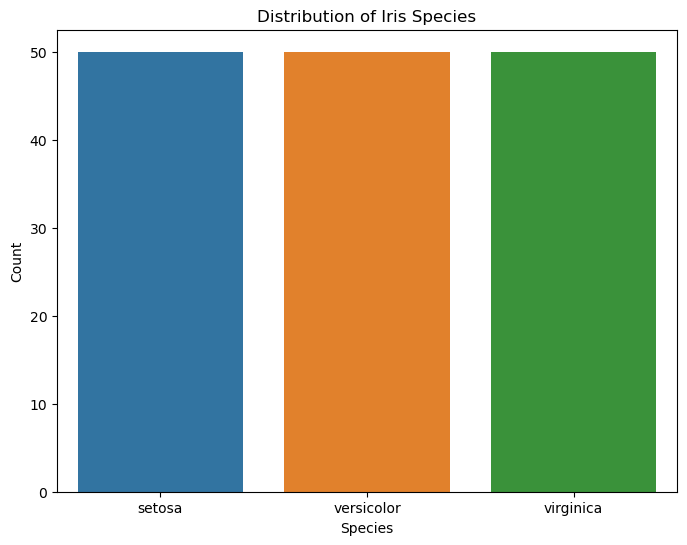

In [18]:
species_counts = df['species'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Training model using DecisionTreeClassifier

## Split data into features(x) and target(y)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
x=df.drop(['species'],axis=1)
y=df['species']

## Train Test Split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

## Make predictions

In [33]:
y_pred=dtc.predict(x_test)

## Evaluate model

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
print("accuracy is : ",accuracy_score(y_test,y_pred))

accuracy is :  0.9666666666666667


In [36]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 25,  1],
       [ 0,  1, 14]], dtype=int64)

## Predictions

In [37]:
pl=float(input("Enter petal length : "))
pw=float(input("Enter petal width : "))
sl=float(input("Enter sepal length : "))
sw=float(input("Enter sepal width : "))
print("Predicted species is ",dtc.predict([[pl,pw,sl,sw]])[0])

Enter petal length : 1
Enter petal width : 2
Enter sepal length : 3
Enter sepal width : 4
Predicted species is  virginica


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
